V3: 
+ Delete the stop words
+ LSTM uses the Tokenizert.fit_on_texts(data) then Tokenizert.texts_to_sequences(data) to do the preprocessing
+ Other models uses the TfidfVectorizer to do the the preprocessing
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# Dataset from https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection#
df1 = pd.read_csv("../data/UCI-YouTube-Spam-Collection/Youtube01-Psy.csv")

In [3]:
df1.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
# Load all our dataset to merge them
df2 = pd.read_csv("../data/UCI-YouTube-Spam-Collection/Youtube02-KatyPerry.csv")
df3 = pd.read_csv("../data/UCI-YouTube-Spam-Collection/Youtube03-LMFAO.csv")
df4 = pd.read_csv("../data/UCI-YouTube-Spam-Collection/Youtube04-Eminem.csv")
df5 = pd.read_csv("../data/UCI-YouTube-Spam-Collection/Youtube05-Shakira.csv")

In [5]:
frames = [df1,df2,df3,df4,df5]

In [6]:
# Merging or Concatenating our DF
df_merged = pd.concat(frames)

In [7]:
df_merged.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [8]:
# Total Size
df_merged.shape

(1956, 5)

Now let's create new feature "message length" and plot it to see if it's of any interest

In [9]:
# Save and Write Merged Data to csv
df_merged.to_csv("../data/youtube-spam-merged.csv")

In [10]:
df = df_merged

#### Data Cleaning

In [11]:
# Checking for Consistent Column Name
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [12]:
# Checking for Datatypes
df.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [13]:
# Check for missing nan
df.isnull().isnull().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

Now drop "COMMENT_ID", 'AUTHOR', 'DATE', columns and rename CLASS and CONTENT to "label" and "content"

In [14]:
ytb = df[["CONTENT","CLASS"]]
ytb = df.rename(columns = {'CONTENT':'content','CLASS':'label'})

Let's look into our data

In [15]:
ytb.groupby('label').describe()

AUTHOR                       COMMENT_ID         \
       count unique       top freq      count unique   
label                                                  
0        951    922  5000palo    7        951    950   
1       1005    871     M.E.S    8       1005   1003   

                                                         DATE         \
                                               top freq count unique   
label                                                                  
0      _2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0    2   951    950   
1      LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s    2   760    760   

                                       content         \
                              top freq   count unique   
label                                                   
0      2013-10-05T00:57:25.078000    2     951    919   
1             2014-11-07T18:08:44    1    1005    841   

                                               
                                     top freq  
label                                          
0                            Shakira :-*    4  
1      Check out this video on YouTube:﻿   97

Now let's create new feature "message length" and plot it to see if it's of any interest

In [16]:
ytb['length'] = ytb['content'].apply(len)

ytb['label'] = ytb['label'].apply(lambda x: 'spam' if x==1 else 'ham')
ytb.head()

,COMMENT_ID,AUTHOR,DATE,content,label,length
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",spam,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,spam,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,spam,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,spam,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,spam,39


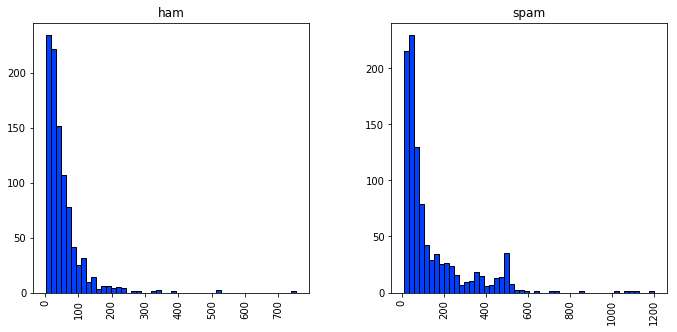

In [17]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
ytb.hist(column='length', by='label', bins=50,figsize=(11,5))
plt.savefig("../img/ytb-length-distribution.eps")
plt.show()

### Text processing and vectorizing our meddages

Let's create new data frame. We'll need a copy later on

In [18]:
text_feat = ytb['content'].copy()

Now define our tex precessing function. It will remove any punctuation and stopwords aswell.

In [19]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [20]:
text_feat = text_feat.apply(text_process)

In [21]:
vectorizer = TfidfVectorizer("english")

In [22]:
features = vectorizer.fit_transform(text_feat)

In [23]:
labels = LabelEncoder().fit_transform(ytb['label'])
labels = labels.reshape(-1,1)

In [24]:
text_feat.shape

(1956,)

In [25]:
features.shape

(1956, 4185)

###  Classifiers and predictions

First of all let's split our features to test and train set

Now let's import bunch of classifiers, initialize them and make a dictionary to itereate through

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=500, random_state=111)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)

In [28]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=111)

In [29]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

Let's make functions to fit our classifiers and make predictions

In [30]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [31]:
def predict_labels(clf, features):
    return (clf.predict(features))

Now iterate through classifiers and save the results

In [32]:
import time

In [33]:
pred_scores = []
for k,v in clfs.items():
    since = time.time()
   
    train_classifier(v, features_train, labels_train)
    time_elapsed = time.time() - since
    
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [precision_score(labels_test,pred), recall_score(labels_test,pred), accuracy_score(labels_test,pred), f1_score(labels_test,pred), '{:.0f}m {:.4f}s'.format(time_elapsed // 60, time_elapsed % 60)]))


/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was ex

In [35]:
# pred_scores

In [36]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Precision', 'Recall', 'Accuracy', 'F1', 'Training Time (s)'])
df


,Precision,Recall,Accuracy,F1,Training Time (s)
SVC,0.963563,0.788079,0.875639,0.867031,0m 0.0960s
KN,0.984615,0.211921,0.592845,0.348774,0m 0.0027s
NB,0.896797,0.834437,0.865417,0.864494,0m 0.0013s
DT,0.950192,0.821192,0.885860,0.880995,0m 0.0464s
LR,0.966942,0.774834,0.870528,0.860294,0m 0.0032s
RF,0.976190,0.814570,0.894378,0.888087,0m 4.4849s
AdaBoost,0.949219,0.804636,0.877342,0.870968,0m 0.4646s
BgC,0.975709,0.798013,0.885860,0.877960,0m 0.3137s
ETC,0.940239,0.781457,0.862010,0.853526,0m 0.1693s


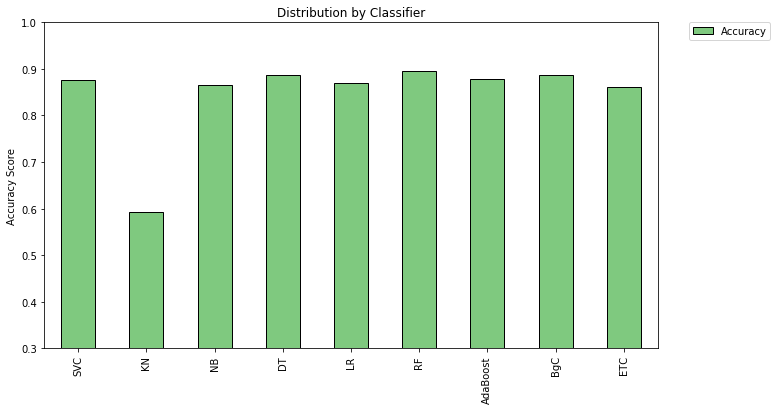

In [38]:
df.plot(kind='bar', y="Accuracy", ylim=(0.3,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("../img/ytb-acc-basemodel-v3-stop.eps")
plt.show()

### RNN
Define the RNN structure.

In [39]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback

Using TensorFlow backend.


### Process the data
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the *max_len* and here an arbitrary length of 500 is chosen. (From the Fig, almost all the sentences have the length < 500)

In [40]:
features_lstm = text_feat
labels_lstm = labels

In [41]:
max_words = 1000
max_len = 500 # n_features
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(features_lstm)
sequences = tok.texts_to_sequences(features_lstm)
features_lstm = sequence.pad_sequences(sequences,maxlen=max_len)

In [42]:
features_lstm.shape

(1956, 500)

In [43]:
labels_lstm.shape

(1956, 1)

In [44]:
features_lstm_train, features_lstm_test, labels_lstm_train, labels_lstm_test = train_test_split(features_lstm, labels_lstm, test_size=0.3, random_state=111, stratify=labels_lstm)


In [45]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(100)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.1)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [46]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               25856     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [47]:
since = time.time()
    

model.fit(features_lstm_train, labels_lstm_train, epochs=10, batch_size=128,validation_split=0.2,
                      callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

time_elapsed = time.time() - since

Train on 1095 samples, validate on 274 samples
Epoch 1/10
1095/1095 [==============================] - 9s 8ms/step - loss: 0.6754 - acc: 0.6347 - val_loss: 0.6242 - val_acc: 0.7226
Epoch 2/10
1095/1095 [==============================] - 8s 7ms/step - loss: 0.5560 - acc: 0.7799 - val_loss: 0.4547 - val_acc: 0.8321
Epoch 3/10
1095/1095 [==============================] - 8s 7ms/step - loss: 0.3774 - acc: 0.8676 - val_loss: 0.3745 - val_acc: 0.8686
Epoch 4/10
1095/1095 [==============================] - 8s 7ms/step - loss: 0.2655 - acc: 0.9187 - val_loss: 0.3687 - val_acc: 0.8467
Epoch 5/10
1095/1095 [==============================] - 8s 7ms/step - loss: 0.2274 - acc: 0.9160 - val_loss: 0.3226 - val_acc: 0.8577
Epoch 6/10
1095/1095 [==============================] - 8s 7ms/step - loss: 0.1764 - acc: 0.9388 - val_loss: 0.3354 - val_acc: 0.8686


In [48]:
print('Training complete in {:.0f}m {:.4f}s'.format(
        time_elapsed // 60, time_elapsed % 60)) 

Training complete in 0m 48.4925s


In [49]:
pred = (np.asarray(model.predict(features_lstm_test, batch_size=128))).round()

In [50]:
pred_scores.append(("LSTM", [precision_score(labels_lstm_test,pred), recall_score(labels_lstm_test,pred), accuracy_score(labels_lstm_test,pred), f1_score(labels_lstm_test,pred), '{:.0f}m {:.4f}s'.format(time_elapsed // 60, time_elapsed % 60)]))


### gcForest

In [51]:
import sys
sys.path.append("..") 
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json

In [52]:
def get_toy_config():
    config = {}
    ca_config = {}
    ca_config["random_state"] = 111
    ca_config["max_layers"] = 20
    ca_config["early_stopping_rounds"] = 3
    ca_config["n_classes"] = 2
    ca_config["estimators"] = []
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "MultinomialNB"})
    ca_config["estimators"].append({"n_folds": 5, "type": "LogisticRegression"})
    config["cascade"] = ca_config
    return config

In [53]:
config = get_toy_config()
gc = GCForest(config)

# features_train 为 ndarray，labels_train 维度为 (n_samples, )，而不是(n_samples, 1)
features_gc_train = features_train.toarray()
labels_gc_train = labels_train.reshape(-1)

since = time.time()
gc.fit_transform(features_gc_train, labels_gc_train)

time_elapsed = time.time() - since

# gc.fit_transform(features_train, labels_train, features_test, labels_test)

[ 2019-04-23 15:15:55,771][cascade_classifier.fit_transform] X_groups_train.shape=[(1369, 4185)],y_train.shape=(1369,),X_groups_test.shape=no_test,y_test.shape=no_test
[ 2019-04-23 15:15:55,845][cascade_classifier.fit_transform] group_dims=[4185]
[ 2019-04-23 15:15:55,846][cascade_classifier.fit_transform] group_starts=[0]
[ 2019-04-23 15:15:55,847][cascade_classifier.fit_transform] group_ends=[4185]
[ 2019-04-23 15:15:55,848][cascade_classifier.fit_transform] X_train.shape=(1369, 4185),X_test.shape=(0, 4185)
[ 2019-04-23 15:15:55,888][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(1369, 4185), X_cur_test.shape=(0, 4185)
[ 2019-04-23 15:15:56,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_0.predict)=90.91%
[ 2019-04-23 15:15:56,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_1.predict)=89.78%
[ 2019-04-23 15:15:57,323][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 

[ 2019-04-23 15:16:01,805][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 5_folds.train_1.predict)=89.78%
[ 2019-04-23 15:16:01,958][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 5_folds.train_2.predict)=87.59%
[ 2019-04-23 15:16:02,129][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 5_folds.train_3.predict)=91.94%
[ 2019-04-23 15:16:02,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 5_folds.train_4.predict)=92.31%
[ 2019-04-23 15:16:02,276][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 5_folds.train_cv.predict)=90.28%
[ 2019-04-23 15:16:02,299][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 5_folds.train_0.predict)=91.27%
[ 2019-04-23 15:16:02,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 5_folds.train_1.predict)=89.78%
[ 2019-04-23 15:16:02,364][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 5_folds.train_2.predict)=91.97%
[ 2019-

[ 2019-04-23 15:16:05,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_1 - 5_folds.train_1.predict)=90.88%
[ 2019-04-23 15:16:05,992][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_1 - 5_folds.train_2.predict)=89.42%
[ 2019-04-23 15:16:06,034][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_1 - 5_folds.train_3.predict)=91.58%
[ 2019-04-23 15:16:06,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_1 - 5_folds.train_4.predict)=92.67%
[ 2019-04-23 15:16:06,057][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_1 - 5_folds.train_cv.predict)=91.23%
[ 2019-04-23 15:16:06,092][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_2 - 5_folds.train_0.predict)=89.45%
[ 2019-04-23 15:16:06,119][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_2 - 5_folds.train_1.predict)=91.61%
[ 2019-04-23 15:16:06,152][kfold_wrapper.log_eval_metrics] Accuracy(layer_6 - estimator_2 - 5_folds.train_2.predict)=91.24%
[ 2019-

In [54]:
print('Training complete in {:.0f}m {:.4f}s'.format(
        time_elapsed // 60, time_elapsed % 60)) 

Training complete in 0m 12.9330s


In [55]:
pred = predict_labels(gc,features_test.toarray())
pred_scores.append(("DCF", [precision_score(labels_test,pred), recall_score(labels_test,pred), accuracy_score(labels_test,pred), f1_score(labels_test,pred), '{:.0f}m {:.4f}s'.format(time_elapsed // 60, time_elapsed % 60)]))

[ 2019-04-23 15:16:08,735][cascade_classifier.transform] X_groups_test.shape=[(587, 4185)]
[ 2019-04-23 15:16:08,785][cascade_classifier.transform] group_dims=[4185]
[ 2019-04-23 15:16:08,786][cascade_classifier.transform] X_test.shape=(587, 4185)
[ 2019-04-23 15:16:08,822][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(587, 4185)
[ 2019-04-23 15:16:08,920][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(587, 4191)
[ 2019-04-23 15:16:08,979][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(587, 4191)
[ 2019-04-23 15:16:09,036][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(587, 4191)
[ 2019-04-23 15:16:09,095][cascade_classifier.transform] [layer=4] look_indexs=[0], X_cur_test.shape=(587, 4191)
[ 2019-04-23 15:16:09,154][cascade_classifier.transform] [layer=5] look_indexs=[0], X_cur_test.shape=(587, 4191)


In [56]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Precision', 'Recall', 'Accuracy', 'F1', 'Training Time (s)'])
df

,Precision,Recall,Accuracy,F1,Training Time (s)
SVC,0.963563,0.788079,0.875639,0.867031,0m 0.0960s
KN,0.984615,0.211921,0.592845,0.348774,0m 0.0027s
NB,0.896797,0.834437,0.865417,0.864494,0m 0.0013s
DT,0.950192,0.821192,0.885860,0.880995,0m 0.0464s
LR,0.966942,0.774834,0.870528,0.860294,0m 0.0032s
RF,0.976190,0.814570,0.894378,0.888087,0m 4.4849s
AdaBoost,0.949219,0.804636,0.877342,0.870968,0m 0.4646s
BgC,0.975709,0.798013,0.885860,0.877960,0m 0.3137s
ETC,0.940239,0.781457,0.862010,0.853526,0m 0.1693s
LSTM,0.945736,0.807947,0.877342,0.871429,0m 48.4925s


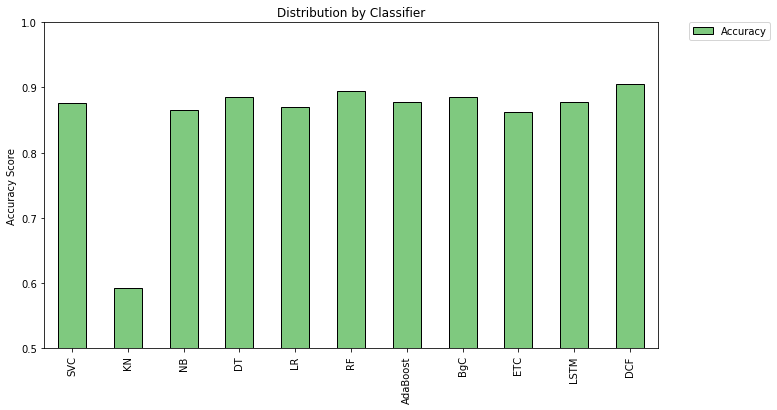

In [59]:
df.plot(kind='bar', y="Accuracy", ylim=(0.5,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(11), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("../img/ytb-acc-v3-stop.eps")
plt.show()

In [60]:
import pickle
# dump
with open("../pkl/ytb-gc-v3-stop.pkl", "wb") as f:
    pickle.dump(gc, f, pickle.HIGHEST_PROTOCOL)
    
# # load
# with open("../pkl/2018_gc.pkl", "rb") as f:
#     gc = pickle.load(f)